# **Unsupervised Learning**

Aim: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

*Approach: We are going to use YellowBrick library to find the optimal numbers of clusters and visualizing them. It is as follows:*

Yellowbrick provides two visualizers to evaluate centroid based clustering, particularly K-Means clustering, that help users discover an optimal K parameter in the clustering.

Both visualizers are based on both primary techiniques for finding K optimal clusters in the dataset which are:

(i)KElbowVisualizer visualizes the clusters according to a scoring function, looking for an "elbow" in the curve.
(ii)SilhouetteVisualizer visualizes the silhouette scores of each cluster in a single model.*


# **Importing Relevant Libraries**

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Importing The Dataset**

In [175]:
path='/content/Iris.csv'
data=pd.read_csv('/content/Iris.csv')


# **Overview Of Dataset**

In [176]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



# **Basic Information Of The Dataset**

*Since the 'Id' column was not relevant, we removed it.*

In [177]:
data.drop(labels='Id',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB



# **Checking for Null/NaN entries**

In [178]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


# **Checking Counts of the present Species**

In [179]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64


# **Data Distribution Species-Wise**

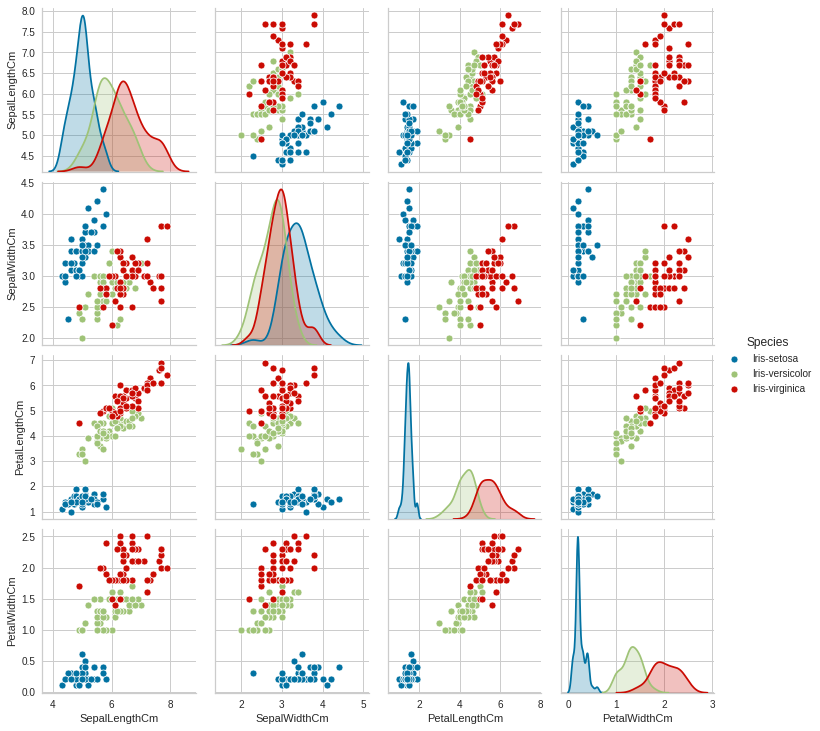

In [180]:
sns.pairplot(data.iloc[:,[0,1,2,3,4]],hue='Species')


# **Finding value of optimal k using KElbowVisualizer**


*We pass the KMeans model to KElbowVisualizer because Visualizers behave as a pipeline and we have to pass the data so it can fit and transform it.*

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c839346d8>,
                 k=None, metric=None, model=None, timings=True)

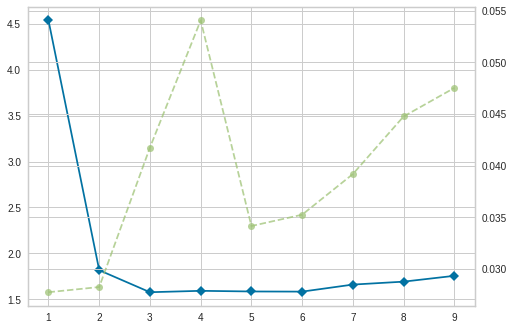

In [181]:
from yellowbrick.cluster import KElbowVisualizer 
from sklearn.cluster import KMeans
model1 = KMeans() 
visualizer = KElbowVisualizer(model1, k=(1,10)) 
visualizer.fit(data.iloc[:,[0,1,2,3]])    

*Since Elbow-like portion bends around 3, 3 is our optimal k.*


# **Visualizing Silhouette Co-efficient using k=3**

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c8395a5c0>,
                     model=None)

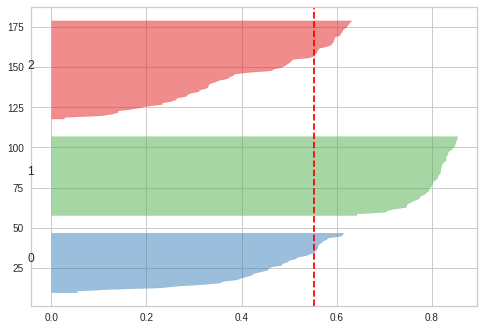

In [182]:
from yellowbrick.cluster import SilhouetteVisualizer
model2 = KMeans(3)
visualizer = SilhouetteVisualizer(model2)

visualizer.fit(data.iloc[:,[0,1,2,3]])    


# **Finally, fixing n_clusters=3 and fitting the data to KMeans Model**

In [183]:
x=data.iloc[:,[0,1,2,3]]
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans= kmeans.fit_predict(x)


## **Visualizing The Clusters Based On First Two Columns**

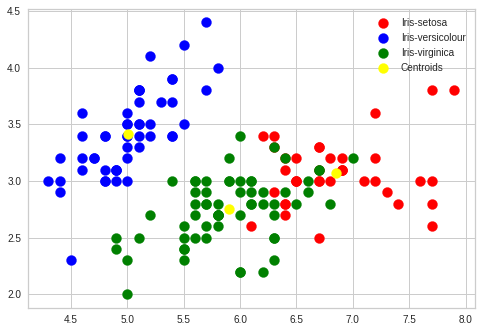

In [184]:
x = np.array(x)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')


plt.legend()
